In [ ]:
#import necessary libraries

In [1]:
import sqlite3 as sql
import pandas as pd

In [ ]:
#connect sql database to jupyter

In [3]:
conn = sql.connect('adventure works new.db')

In [ ]:
# query sql database to extract relevant columns from relevant table

In [11]:
query = """SELECT OrderDate, ProductKey FROM AdventureWorks_Sales WHERE OrderDate>='1/1/2015' AND OrderDate<='12/31/2017'"""
df = pd.read_sql(query,conn)

In [ ]:
#Convert 'orderdate' to datetime format

In [13]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [ ]:
# Set 'Date' column as the Dataframe index

In [15]:
df.set_index('OrderDate',inplace = True)


In [ ]:
# Check for missing values

In [17]:
print(df.isnull().sum())
df.dropna(inplace=True)

ProductKey    0
dtype: int64


In [ ]:
#ensure data is sorted by date

In [19]:
df.sort_index(inplace=True)

In [21]:
print(df.head())

            ProductKey
OrderDate             
2015-01-01         332
2015-01-01         312
2015-01-01         350
2015-01-01         338
2015-01-02         312


In [ ]:
#plot time series

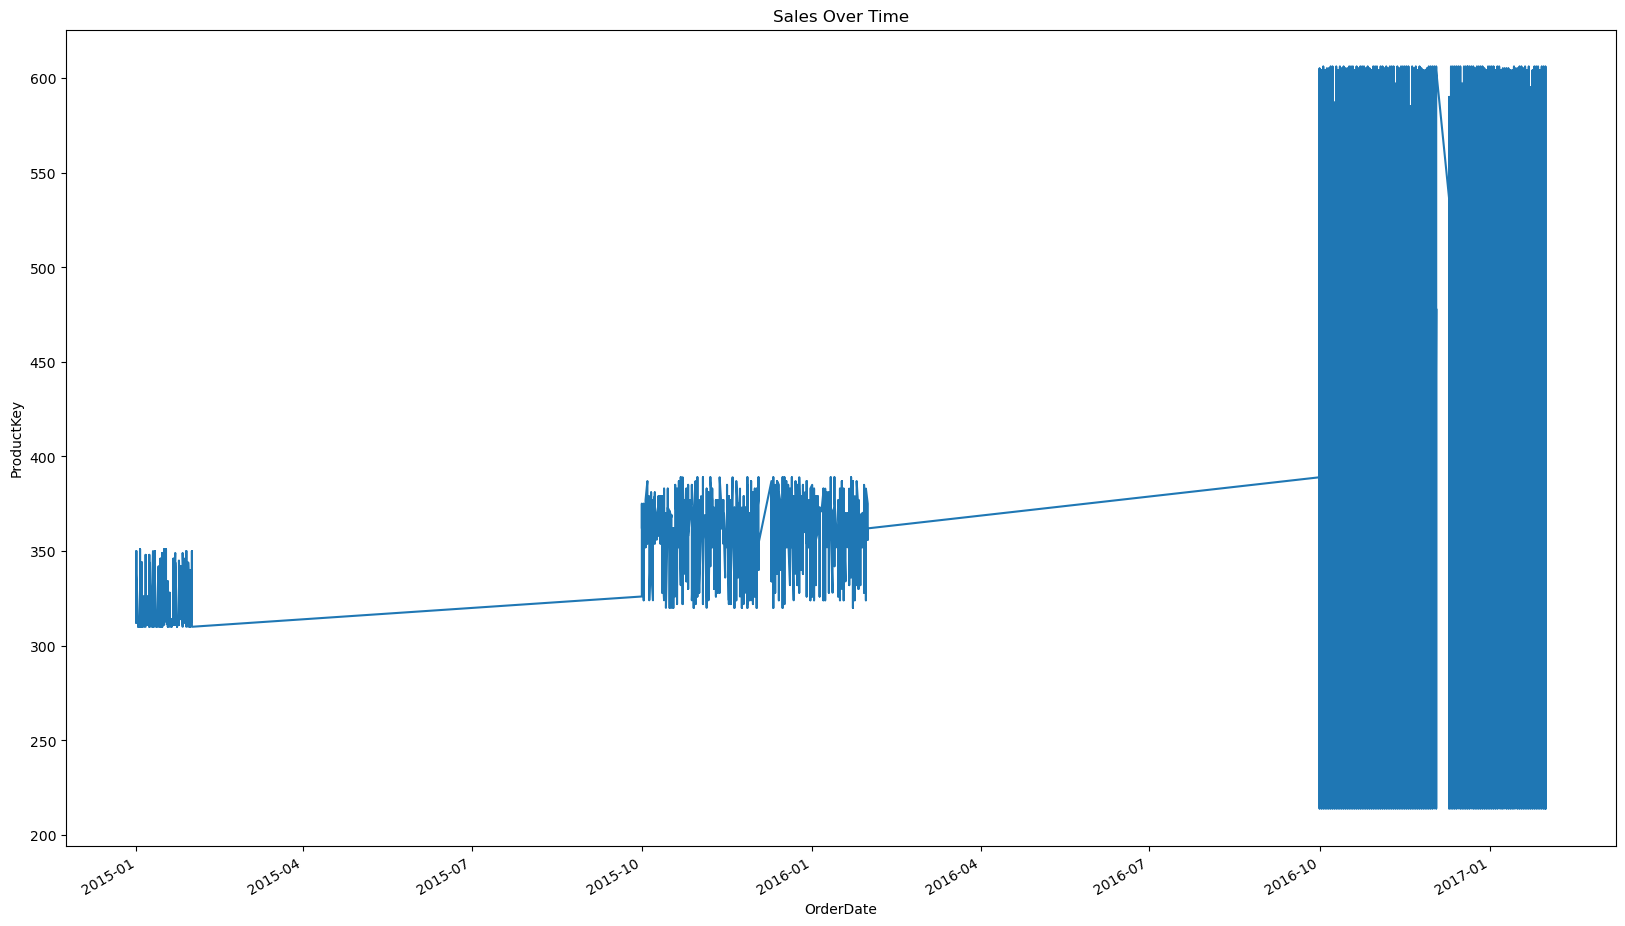

In [27]:
import matplotlib.pyplot as plt
df['ProductKey'].plot(figsize=(20, 12))
plt.title('Sales Over Time')
plt.ylabel('ProductKey')
plt.xlabel('OrderDate')
plt.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Decompose time series to trends, seasonality and residuals

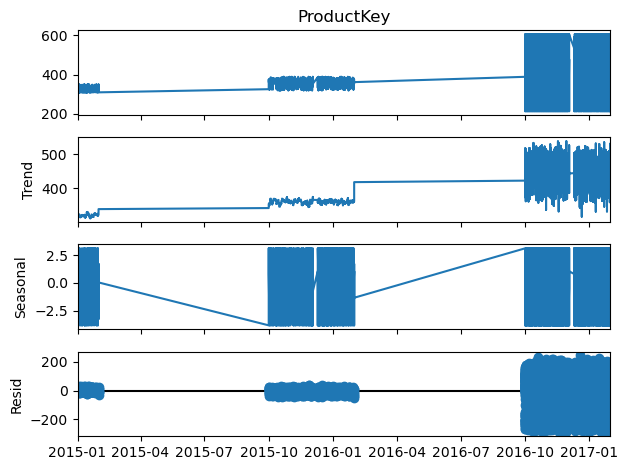

In [33]:
result= seasonal_decompose(df['ProductKey'], model = 'additive', period=12)
result.plot()
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Perform ADF test to check for stationarity

In [39]:
adf_result = adfuller(df['ProductKey'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -11.951532823800214
p-value: 4.305552711249647e-22


In [ ]:
# Fit ARIMA model (you can tune p, d, q values based on ACF/PACF)

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Summary of the model

In [47]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             ProductKey   No. Observations:                17835
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -110057.406
Date:                Sun, 29 Sep 2024   AIC                         220120.813
Time:                        16:46:46   BIC                         220144.179
Sample:                             0   HQIC                        220128.500
                              - 17835                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0672      0.007     -9.076      0.000      -0.082      -0.053
ma.L1         -0.9940      0.001  -1234.282      0.000      -0.996      -0.992
sigma2      1.342e+04    150.880     88.929      0.0

In [ ]:
# Forecast the next 12 periods

In [49]:
forecast = model_fit.forecast(steps = 12)
print(forecast)

17835    469.513288
17836    452.345863
17837    453.499308
17838    453.421811
17839    453.427017
17840    453.426668
17841    453.426691
17842    453.426690
17843    453.426690
17844    453.426690
17845    453.426690
17846    453.426690
Name: predicted_mean, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Plot forecast

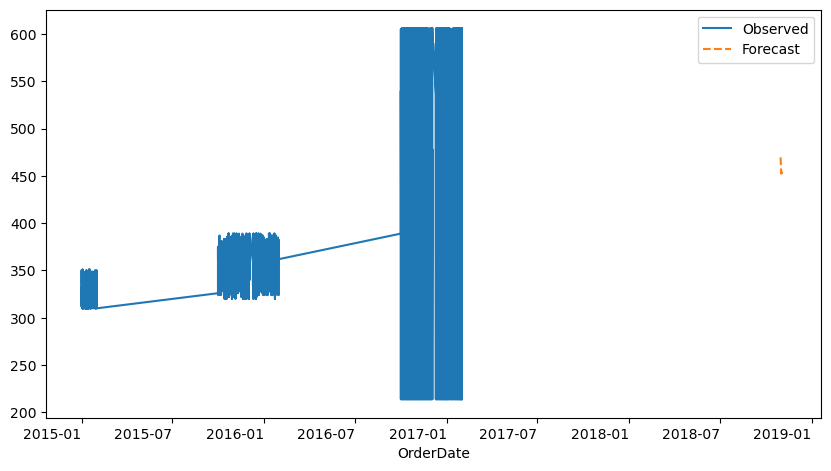

In [51]:
df['ProductKey'].plot(label='Observed', figsize = (10, 6))
forecast.plot(label = 'Forecast', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# Save the forecasted data to SQL database

In [55]:
forecast_df = pd.DataFrame(forecast, columns = ['Forecast'])


In [ ]:
# Connect to SQLite or another database

In [59]:
conn = sql.connect('adventure works new.db')

In [ ]:
# Write the forecast back to a new table

In [61]:
forecast_df.to_sql('sales_forecast', conn, if_exist = 'replace' , index =True)

0

In [ ]:
# Write the forecast back to a new table


In [63]:
conn.close()